In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# __BINNING__

There is some many kind of relationship exists. Binning can help us capture any type of relationship in the modeling. We will give an illustration about example of binning method and performance improvement using binning.

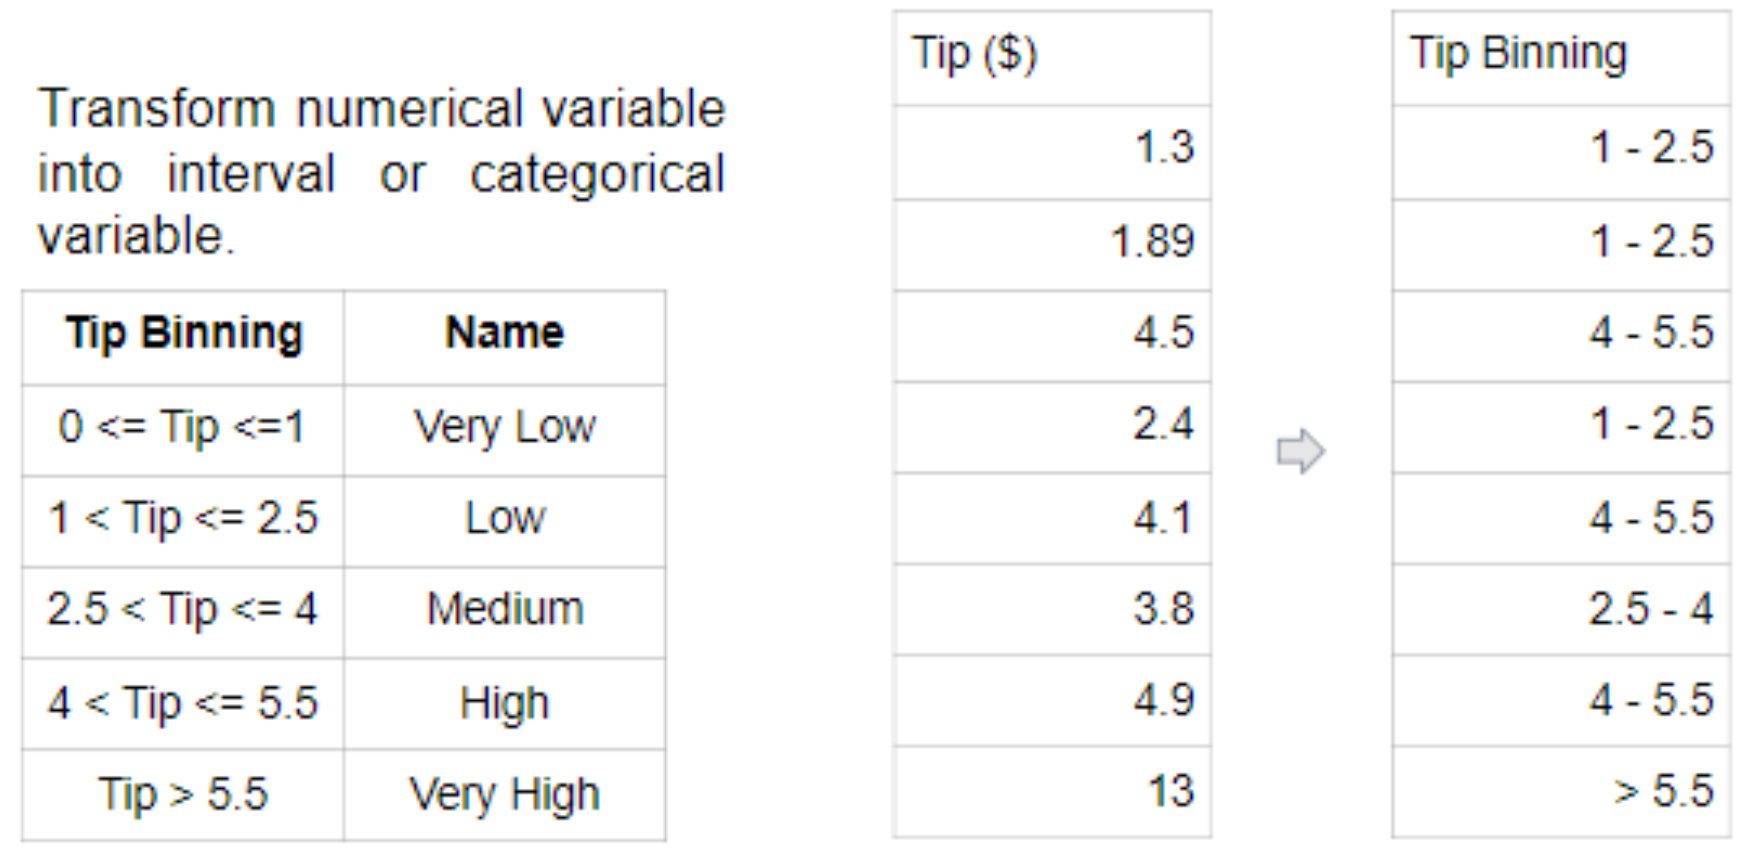

In [2]:
#Load dataset

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


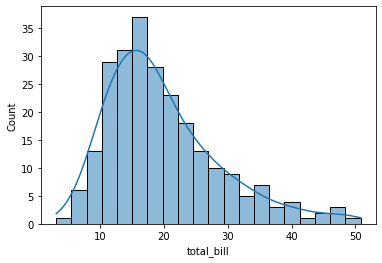

In [3]:
#Memvisualisasikan dengan plot

sns.histplot(tips['total_bill'], bins=20, kde=True)
plt.show()

In [4]:
#1. Membuat dataset baru dan melakukan binning

tips2 = tips.copy()
# tips2['total_bill total_bill_eqfreq total_bill_eqintv total_bill_eqfreq_encoded total_bill_eqintv_encoded'.split()]

tips2.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


> ## __1. Equal Frequencies__

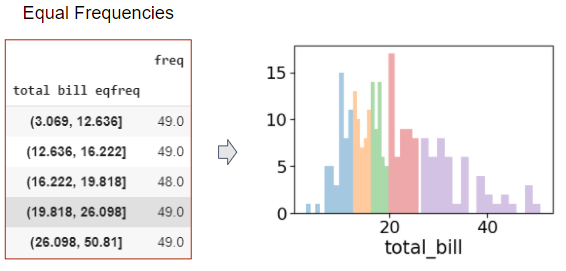

In [5]:
#1.Melakukan binning equal frequensi secara manual

tips2['total_bill_eqfreq'] = pd.qcut(tips2['total_bill'], 5) #binning equal freq
tips2['total_bill_eqfreq_encoded'] = pd.qcut(tips2['total_bill'], 5, labels = range(1,6)) #melabel binning equal freq

tips2.head()

,total_bill,tip,sex,smoker,day,time,size,total_bill_eqfreq,total_bill_eqfreq_encoded
0,16.99,1.01,Female,No,Sun,Dinner,2,"(16.222, 19.818]",3
1,10.34,1.66,Male,No,Sun,Dinner,3,"(3.069, 12.636]",1
2,21.01,3.50,Male,No,Sun,Dinner,3,"(19.818, 26.098]",4
3,23.68,3.31,Male,No,Sun,Dinner,2,"(19.818, 26.098]",4
4,24.59,3.61,Female,No,Sun,Dinner,4,"(19.818, 26.098]",4


In [6]:
#Membuat picot tabel

eqfreq = tips2.pivot_table(
    index ='total_bill_eqfreq',
    aggfunc = len,
    values = 'tip'
)
eqfreq.columns = ['freq']

eqfreq

,freq
total_bill_eqfreq,
"(3.069, 12.636]",49.0
"(12.636, 16.222]",49.0
"(16.222, 19.818]",48.0
"(19.818, 26.098]",49.0
"(26.098, 50.81]",49.0


__Terlihat jumlah freq sama__

> ## __2. Equal Interval__

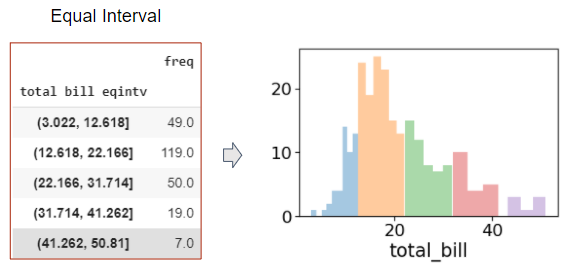

In [7]:
#1.Melakukan binning equal interval secara manual

tips2['total_bill_eqintv'] = pd.cut(tips2['total_bill'], 5) #binning equal intv
tips2['total_bill_eqintv_encoded'] = pd.cut(tips2['total_bill'], 5, labels = range(1,6)) #melabel binning equal intv

tips2.head()

,total_bill,tip,sex,smoker,day,time,size,total_bill_eqfreq,total_bill_eqfreq_encoded,total_bill_eqintv,total_bill_eqintv_encoded
0,16.99,1.01,Female,No,Sun,Dinner,2,"(16.222, 19.818]",3,"(12.618, 22.166]",2
1,10.34,1.66,Male,No,Sun,Dinner,3,"(3.069, 12.636]",1,"(3.022, 12.618]",1
2,21.01,3.50,Male,No,Sun,Dinner,3,"(19.818, 26.098]",4,"(12.618, 22.166]",2
3,23.68,3.31,Male,No,Sun,Dinner,2,"(19.818, 26.098]",4,"(22.166, 31.714]",3
4,24.59,3.61,Female,No,Sun,Dinner,4,"(19.818, 26.098]",4,"(22.166, 31.714]",3


In [8]:
#Membuat picot tabel

eqintv = tips2.pivot_table(
    index = 'total_bill_eqintv',
    aggfunc = len,
    values = 'tip'
)
eqintv.columns = ['freq']

eqintv

,freq
total_bill_eqintv,
"(3.022, 12.618]",49.0
"(12.618, 22.166]",119.0
"(22.166, 31.714]",50.0
"(31.714, 41.262]",19.0
"(41.262, 50.81]",7.0


__Tidak memiliki frekuensi yg sama, namun intervalnya sama__

C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


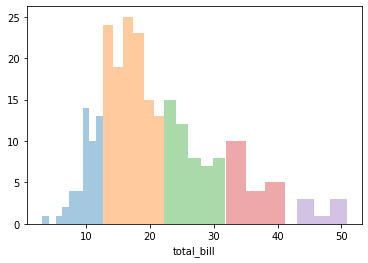

In [9]:
#Memvisualisasikan semua kelas dalam plot

for i in range(1,6):
    sns.distplot(tips2[tips2['total_bill_eqintv_encoded'] == i]['total_bill'], kde=False)

<AxesSubplot:xlabel='total_bill'>

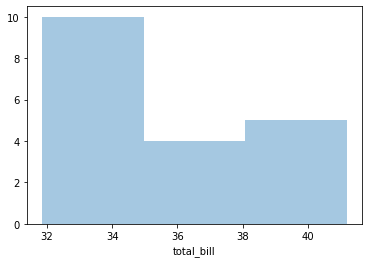

In [10]:
# Menampilkan visualisasi plot kelas ke-4

sns.distplot(tips2[tips2['total_bill_eqintv_encoded'] == 4]['total_bill'], kde = False)

In [13]:
# Menampilkan data kelas ke-4 pada interval 31.6 - 35

tips2[tips2['total_bill_eqintv_encoded'] == 4]['total_bill_eqintv total_bill total_bill_eqintv_encoded'.split()][tips2['total_bill'].between(31.6, 35)]

<ipython-input-13-9efb04f86ad6>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tips2[tips2['total_bill_eqintv_encoded'] == 4]['total_bill_eqintv total_bill total_bill_eqintv_encoded'.split()][tips2['total_bill'].between(31.6, 35)]


,total_bill_eqintv,total_bill,total_bill_eqintv_encoded
47,"(31.714, 41.262]",32.40,4
52,"(31.714, 41.262]",34.81,4
83,"(31.714, 41.262]",32.68,4
85,"(31.714, 41.262]",34.83,4
141,"(31.714, 41.262]",34.30,4
173,"(31.714, 41.262]",31.85,4
175,"(31.714, 41.262]",32.90,4
179,"(31.714, 41.262]",34.63,4
180,"(31.714, 41.262]",34.65,4
237,"(31.714, 41.262]",32.83,4


## __Binning Effect on Modeling__

Now, we want to illustrate how binning can improve model performance. First, we want to do some data exploreation and then go ahead into the modeling process.

In [14]:
from sklearn.preprocessing import KBinsDiscretizer

disk = pd.read_csv('disk.csv')
disk.head()

,x,class
0,51,0
1,19,1
2,66,1
3,35,0
4,64,1


In [15]:
#Menghitung value counts pada kolom class

disk['class'].value_counts(normalize=True)
#Terlihat rasionya hampir sama

1    0.51864
0    0.48136
Name: class, dtype: float64

In [16]:
#Melihat analisis descriptive

disk.describe()

,x,class
count,1529.000000,1529.000000
mean,42.809026,0.518640
std,14.299211,0.499816
min,18.000000,0.000000
25%,31.000000,0.000000
50%,44.000000,1.000000
75%,55.000000,1.000000
max,67.000000,1.000000


In [17]:
#1. Melakukan binning secara manual

disk['x_eqintv'] = pd.cut(disk['x'], 7) #binning equal intv
disk['x_eqintv_encoded'] = pd.cut(disk['x'], 7, labels = range(1,8)) #melabel binning equal intv

disk.head()

,x,class,x_eqintv,x_eqintv_encoded
0,51,0,"(46.0, 53.0]",5
1,19,1,"(17.951, 25.0]",1
2,66,1,"(60.0, 67.0]",7
3,35,0,"(32.0, 39.0]",3
4,64,1,"(60.0, 67.0]",7


In [18]:
len(disk) #banyaknya data / sample

1529

In [19]:
#melihat proporsi dataset dalam bentuk rasio per index

pd.crosstab(disk['x_eqintv'], disk['class'], normalize=0) #normalize per index

class,0,1
x_eqintv,,
"(17.951, 25.0]",0.224670,0.775330
"(25.0, 32.0]",0.537037,0.462963
"(32.0, 39.0]",0.835616,0.164384
"(39.0, 46.0]",0.846561,0.153439
"(46.0, 53.0]",0.583673,0.416327
"(53.0, 60.0]",0.302632,0.697368
"(60.0, 67.0]",0.068293,0.931707


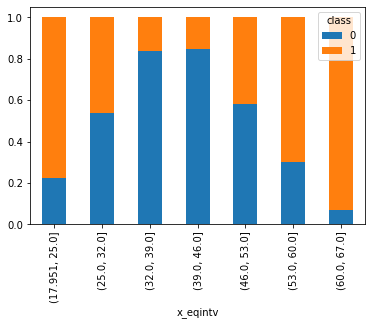

In [20]:
#Memvisualisasikan untuk melihat data linear atau tidak

pd.crosstab(disk['x_eqintv'], disk['class'], normalize=0).plot(kind = 'bar', stacked=True)
plt.show()

from illustration above, you can see that the x variabel alraedy binned into seven categories and you can see the class proportion aswell. The propotion of the '1' class keep decreasing until the fourth class and after that the proportion increase instead. This show __a non linear relationship between x and the probability of the '1' class. Adding polynomial feature surely can improve the performance but we will try binning instead.__

> ### __MODEL 1 : Logistic Regression without binning__

In [22]:
#1. Menentukan data variabel dependen dan independen

X = disk[['x']]
y = disk['class']

In [23]:
#2. Melakukan data splitting

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=2020)

In [25]:
#3. Melakukan model fitting

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [26]:
#4. Melakukan prediksi

y_pred = logreg.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,

In [29]:
#5. Melihat model performance

print('accuracy', accuracy_score(y_test, y_pred))

accuracy 0.5822454308093995


This is the modeling when we dont use binning. we dont give any treatment to the feature. The model accuracy is 58.22%.

> ### __MODEL 2 : Logistic Regression with Binning__

In [30]:
#1. Melakukan binning secara otomatis

discretize = KBinsDiscretizer(n_bins=7, encode='onehot', strategy='uniform') # uniform = eqintv ; quantile = eqfreq
discretize.fit(X_train)

X_train_disc = discretize.transform(X_train)
X_test_disc = discretize.transform(X_test)

In [31]:
print(X_train_disc[:5])

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 5)	1.0
  (3, 3)	1.0
  (4, 6)	1.0


In [32]:
#2. Melakukan model fitting

logreg = LogisticRegression()
logreg.fit(X_train_disc, y_train)

LogisticRegression()

In [33]:
#3. Melakukan prediksi

y_pred = logreg.predict(X_test_disc)

In [34]:
#4. Melihat model performance

print('accuracy', accuracy_score(y_test, y_pred))

accuracy 0.6997389033942559


__After we apply binning, the accuracy significantly improve from 58.22% to 69.97%. Binning surely can be used to improve model performance.__